In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
import mediapipe as mp

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

2024-07-03 22:02:12.159740: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-03 22:02:12.736369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 22:02:13.628848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5, min_tracking_confidence=0.5, static_image_mode=False
)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shar

(764, 951, 4)


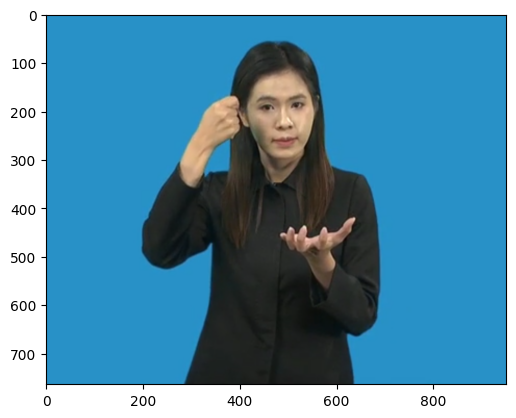

In [3]:
img = np.array(Image.open("sign_language_translate/test.png"))
print(img.shape)
plt.imshow(img)

In [4]:
point_result = holistic_model.process(img[:, :, :3])

/home/bk/miniconda3/envs/keras/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [5]:
def get_4x4_matrix(landmark, width, height):
    """Converts a landmark to a 4x4 transformation matrix."""
    cx, cy, cz = landmark.x * width, landmark.y * height, landmark.z
    matrix = np.eye(4)
    matrix[0, 3] = cx
    matrix[1, 3] = cy
    matrix[2, 3] = cz
    return matrix.tolist()

In [7]:
from scipy.spatial.transform import Rotation as R 

In [8]:
landmarks_list = point_result.pose_landmarks.landmark

In [7]:
landmarks_list

[x: 0.0419077389
y: -0.55070281
z: -0.334625781
visibility: 0.999913
, x: 0.046467565
y: -0.589870334
z: -0.322285533
visibility: 0.999925375
, x: 0.0449719876
y: -0.592860281
z: -0.32238844
visibility: 0.99988842
, x: 0.0449584536
y: -0.59238559
z: -0.323718876
visibility: 0.999917746
, x: 0.0104751168
y: -0.584399581
z: -0.320470691
visibility: 0.999846458
, x: 0.01141854
y: -0.584490716
z: -0.322907746
visibility: 0.99971658
, x: 0.0116634481
y: -0.586454093
z: -0.322917491
visibility: 0.999775112
, x: 0.100954682
y: -0.591092587
z: -0.206836343
visibility: 0.999926925
, x: -0.0541486405
y: -0.571121812
z: -0.204482794
visibility: 0.999722421
, x: 0.0682254061
y: -0.538222313
z: -0.29421106
visibility: 0.999985218
, x: 0.0217796769
y: -0.528136492
z: -0.289771199
visibility: 0.999951601
, x: 0.197966486
y: -0.414545596
z: -0.150033325
visibility: 0.999982238
, x: -0.137150779
y: -0.408331364
z: -0.133638516
visibility: 0.999752939
, x: 0.167590424
y: -0.174895123
z: -0.253853589
vis

In [10]:
get_4x4_matrix(landmarks_list[14], 951, 764)

[[1.0, 0.0, 0.0, 228.00505381822586],
 [0.0, 1.0, 0.0, 499.6902780532837],
 [0.0, 0.0, 1.0, -0.681145429611206],
 [0.0, 0.0, 0.0, 1.0]]

In [13]:
c = np.array([[1.0, 0.0, 0.0, 228.00505381822586], [0.0, 1.0, 0.0, 499.6902780532837], [0.0, 0.0, 1.0, -0.681145429611206], [0.0, 0.0, 0.0, 1.0]])

In [12]:
p = np.array([[1.0, 0.0, 0.0, 362.4836049377918], [0.0, 1.0, 0.0, 353.39385759830475], [0.0, 0.0, 1.0, -0.28954771161079407], [0.0, 0.0, 0.0, 1.0]])

In [15]:
def get_relative_matrix(parent_matrix, child_matrix):
    """Compute the relative transformation matrix of a child to its parent."""
    parent_inv = np.linalg.inv(parent_matrix)
    relative_matrix = np.dot(parent_inv, child_matrix)
    return relative_matrix

In [17]:
get_relative_matrix(p, c).tolist()

[[1.0, 0.0, 0.0, -134.47855111956596],
 [0.0, 1.0, 0.0, 146.29642045497894],
 [0.0, 0.0, 1.0, -0.391597718000412],
 [0.0, 0.0, 0.0, 1.0]]

In [ ]:
[[1.0, 0.0, 0.0, -134.47855111956596], [0.0, 1.0, 0.0, 146.29642045497894], [0.0, 0.0, 1.0, -0.391597718000412], [0.0, 0.0, 0.0, 1.0]]

In [75]:
a = 12
b = 14

wrist = np.array([landmarks_list[a].x, landmarks_list[a].y, landmarks_list[a].z])
index_finger_mcp = np.array([landmarks_list[b].x, landmarks_list[b].y, landmarks_list[b].z])
vector = index_finger_mcp - wrist

In [76]:
# Reference direction (e.g., along the x-axis)
reference_direction = np.array([1, 0, 0])

# Normalize vectors
vector = vector / np.linalg.norm(vector)
reference_direction = reference_direction / np.linalg.norm(reference_direction)

# Calculate rotation quaternion
rotation_quaternion = R.from_rotvec(np.cross(reference_direction, vector))

In [77]:
euler_angles = rotation_quaternion.as_euler('xyz', degrees=True)
print(euler_angles)

[ 5.41548218 10.7092699  53.54959518]


In [62]:
point_result.pose_world_landmarks

landmark {
  x: 0.0335487537
  y: -0.621705234
  z: -0.235033751
  visibility: 0.999962151
}
landmark {
  x: 0.0382405035
  y: -0.660284
  z: -0.220541328
  visibility: 0.999955654
}
landmark {
  x: 0.0380782261
  y: -0.661041915
  z: -0.220343471
  visibility: 0.999949157
}
landmark {
  x: 0.0381285548
  y: -0.661258936
  z: -0.220586672
  visibility: 0.999949276
}
landmark {
  x: 0.00162052712
  y: -0.657564163
  z: -0.219452873
  visibility: 0.999954879
}
landmark {
  x: 0.00214048172
  y: -0.657524288
  z: -0.221531659
  visibility: 0.999947071
}
landmark {
  x: 0.00145369943
  y: -0.659145474
  z: -0.220838606
  visibility: 0.999945581
}
landmark {
  x: 0.0957575887
  y: -0.652966917
  z: -0.11108499
  visibility: 0.999959946
}
landmark {
  x: -0.0565194
  y: -0.648206353
  z: -0.106366128
  visibility: 0.999949
}
landmark {
  x: 0.0595956407
  y: -0.60051626
  z: -0.194825947
  visibility: 0.999988198
}
landmark {
  x: 0.0139118498
  y: -0.5963884
  z: -0.192772165
  visibility: 

In [5]:
cv_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [6]:
mp_drawing.draw_landmarks(
    cv_img,
    point_result.face_landmarks,
    mp_holistic.FACEMESH_CONTOURS,
    mp_drawing.DrawingSpec(
        color=(255,0,255),
        thickness=1,
        circle_radius=1
    ),
    mp_drawing.DrawingSpec(
        color=(0,255,255),
        thickness=1,
        circle_radius=1
    )
)

mp_drawing.draw_landmarks(
    cv_img, point_result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
)

mp_drawing.draw_landmarks(
    cv_img, point_result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
)


In [7]:
cv2.imshow("Facial and Hand Landmarks", cv_img)

cv2.waitKey(0)

225

In [8]:
cv2.destroyAllWindows()

In [5]:
cv_video = cv2.VideoCapture("sign_language_translate/test.mp4")

while cv_video.isOpened():
    ret, frame = cv_video.read()

    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    point_result = holistic_model.process(frame)

    cv_img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    mp_drawing.draw_landmarks(
        cv_img,
        point_result.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        mp_drawing.DrawingSpec(
            color=(255,0,255),
            thickness=1,
            circle_radius=1
        ),
        mp_drawing.DrawingSpec(
            color=(0,255,255),
            thickness=1,
            circle_radius=1
        )
    )

    mp_drawing.draw_landmarks(
        cv_img, point_result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
    )

    mp_drawing.draw_landmarks(
        cv_img, point_result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
    )

    cv2.imshow("Facial and Hand Landmarks", cv_img)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

cv_video.release()

In [6]:
cv2.destroyAllWindows() 